**Zadanie 23-3-.03.2020 Cluster Analysis**

1. Poszukujemy odpowiedzi na pytanie czy możliwe jest podzielenie 2 gatunków kaw na podstawie pomiarów stężenia ich pierwiastków. Rozważanymi gatunkami są Arabika i Robusta. Do analizy wybrano 18 próbek (po 9 z gatunku) z oznaczonymi stężeniami 9 pierwiastków.
2. Pomiary stężeń pierwiastków są zmiennymi objaśniającymi. Zmienna "Kawa" zawiera podział na Arabike i Robuste. Będą wykorzystane do porównania poprawności rozdzielenia na podstawie zmiennych objaśniających. "Kawa" będzie indeksową zmienną i pomijamy ją w obliczeniach.

  Kawa     Zn      P    Mn    Fe     Mg    Cu     Ca    Sr    Ba    Na      K
0    A  2.899  0.139  2.68  5.98  0.173  1.78  0.089  4.13  2.92  2.30  1.466
1    R  1.393  0.158  1.22  5.61  0.161  1.68  0.094  4.14  9.10  2.14  1.448
2    A  1.933  0.134  1.41  4.62  0.174  1.34  0.097  5.59  5.31  3.34  1.493
3    R  2.997  0.173  1.98  7.34  0.165  1.31  0.087  4.40  5.01  3.38  1.541
4    A  5.440  0.140  2.93  4.66  0.173  1.12  0.090  5.75  9.17  3.01  1.422


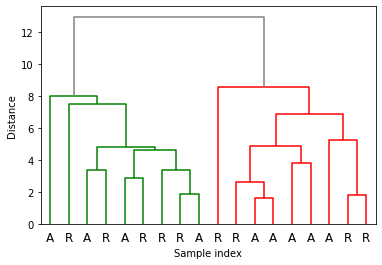

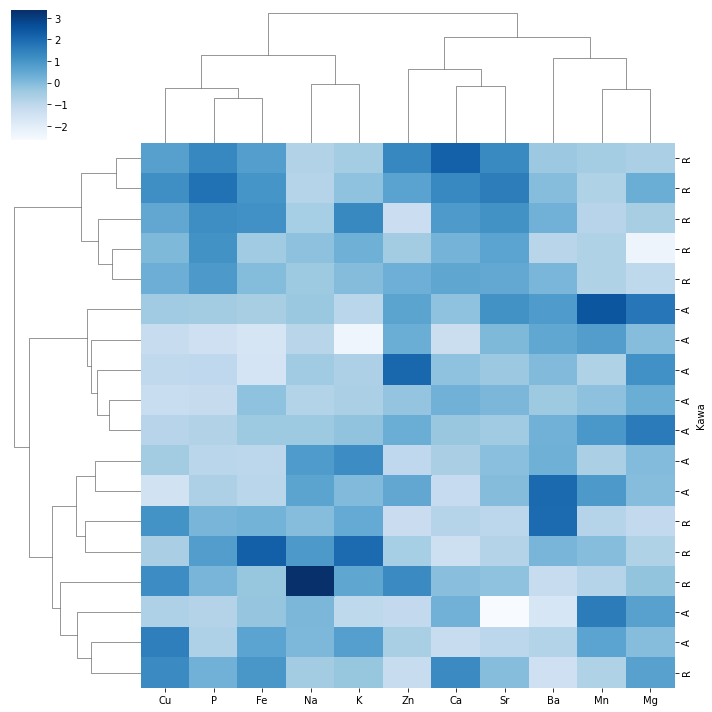

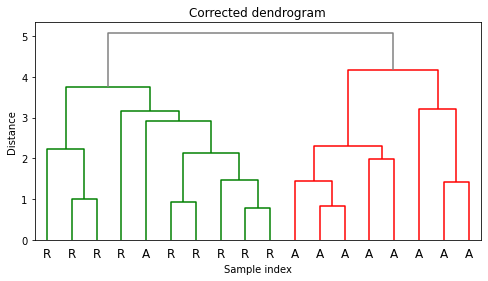

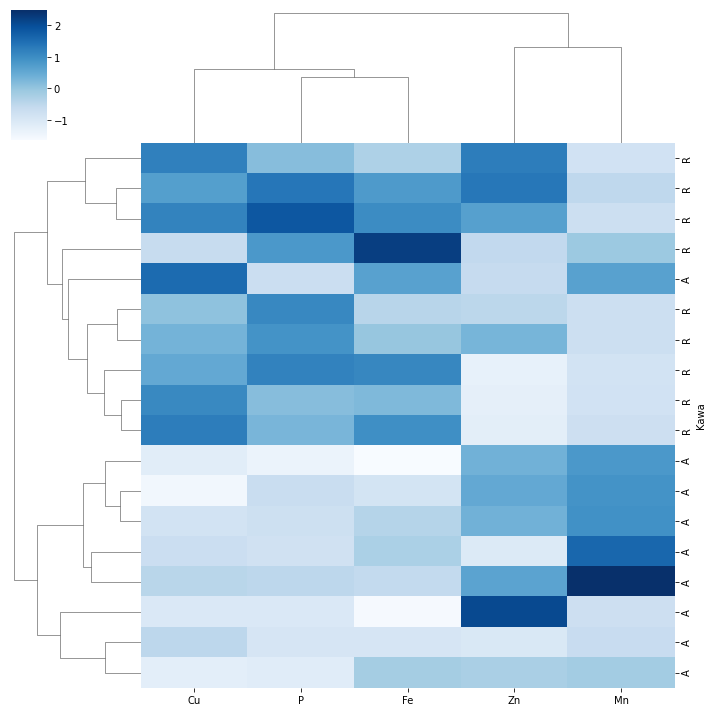

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

df=pd.read_csv("kawa.txt",delim_whitespace=True,header=0)
print(df.head())
df=df.set_index("Kawa")

Z=linkage(df.values,method='ward',metric='euclidean')
d=dendrogram(Z,labels=df.index,color_threshold=10,above_threshold_color='gray')
plt.xlabel('Sample index')
plt.ylabel('Distance')

sns.clustermap(df,metric="euclidean",method="ward",cmap="Blues",z_score=1)

#z mapy cieplnej: Cu,P,Fe i Mn pozwalaja w porzadku podzielic; reszta pierwiastkow psuje podzial

del df['Ba']
del df['K']
del df['Mg']
del df['Ca']
del df['Sr']
del df['Na']

fig= plt.figure(figsize=(8,4))
Z=linkage(df.values,method='complete',metric='seuclidean')
d=dendrogram(Z,labels=df.index,color_threshold=4.5,above_threshold_color='gray')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Corrected dendrogram')

sns.clustermap(df,metric="seuclidean",method="complete",cmap="Blues",z_score=1)



5. Na podstawie pierwszej mapy cieplnej można stwierdzić, że najlepszymi do podziału pierwiastkami są Cu,P,Fe i Mn. Wynik podziału jest satysfakcjonyjący - na podstawie stężeń tych 4 pierwiastków możliwe jest rozróżnienie 8 z 9 próbek typu Arabica. Jedynie jeden przypadek  znacznie różni się w wartościach stężenia Cu, Fe i Zn od innych próbek Arabica, że bardzo ciężkie staje się go odróżnienie. Jednocześnie usunięcie tych zmiennych, które są takie różne pogarsza grupowanie dla reszty przypadków. Robusta charakteryzuje się wyższymi stężeniami Cu, P i Fe, a niższymi Zn i Mn.